## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
from google.colab import drive
drive.mount('../content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ../content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/gdrive/My Drive/CNN/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall(path=project_path)

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall(path=project_path)

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall(path=project_path)

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall(path=project_path)

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [12]:
labels = pd.read_csv('/content/gdrive/My Drive/CNN/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [13]:
labels.sample(10,random_state=10)

,id,breed
8122,cb0716607f4e66bc5bba7532bedf293b,english_foxhound
3856,5f886388c9da2c09d6e3adde3c247243,irish_setter
7654,bfbc332f78159db3fa558392311ffed8,rottweiler
9144,e5be21baaf39b50fca94e56c3b29416d,irish_terrier
7436,ba6eda43b8cf8607e9f7af6dbfaf9538,clumber
4125,66c22f37d5db2318dd6a8f8bf0978180,shetland_sheepdog
5772,91af963a2f4cc1b5ab4f7e5d257b4830,lakeland_terrier
2648,419a994803b6436b2ff3220b192b883d,pekinese
7170,b3c360cdc204d571b5287268fa4b4c25,samoyed
5154,824ad38b99412399623a46ae6a70fad8,sussex_spaniel


### Print the count of each category of Dogs given in the dataset



In [14]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
X=[]
Y=[]

In [16]:
import cv2
import keras
import os
from tqdm import tqdm

Using TensorFlow backend.


In [17]:
for i in tqdm(labels['id']):
  record = cv2.imread('/content/gdrive/My Drive/CNN/train/'+i+'.jpg')
  X.append(cv2.resize(record,(128,128)))

100%|██████████| 10222/10222 [01:19<00:00, 128.81it/s]


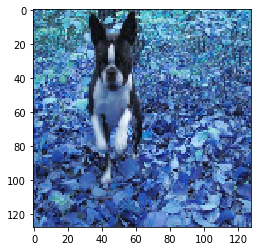

In [20]:
plt.imshow(cv2.resize(X[0],(128,128)))

In [21]:
len(X)

10222

In [22]:
X[0].shape

(128, 128, 3)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels['breed_y'] = le.fit_transform(labels['breed'])

In [24]:
Y = keras.utils.to_categorical(labels['breed_y'],num_classes=np.count_nonzero(labels['breed_y'].value_counts()))
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [26]:
labels['breed_y'].value_counts()

97    126
73    117
1     116
42    115
11    114
     ... 
22     67
49     67
65     67
23     66
43     66
Name: breed_y, Length: 120, dtype: int64

In [27]:
np.count_nonzero(labels['breed'].value_counts())

120

In [28]:
labels.count()

id         10222
breed      10222
breed_y    10222
dtype: int64

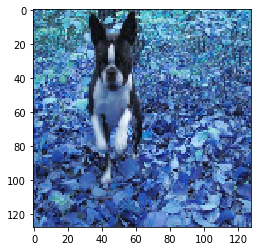

In [29]:
plt.imshow(cv2.resize(X[0],(128,128)))

In [31]:
len(Y)

10222

In [0]:
x_train_data = np.array(X)
y_train_data = np.array(Y)

In [33]:
x_train_data.shape

(10222, 128, 128, 3)

In [34]:
y_train_data.shape

(10222, 120)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_train_data,y_train_data,test_size=0.3,random_state=9)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test = pd.read_csv('/content/gdrive/My Drive/CNN/sample_submission.csv')
test_img = test['id']

Run the below code to load the test image files in x_test_feature

In [37]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('/content/gdrive/My Drive/CNN/test/'+f+'.jpg')
    img_resize = cv2.resize(img, (128,128)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [01:17<00:00, 133.99it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
np.array(x_test_feature).shape

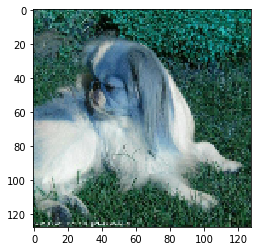

In [38]:
plt.imshow(x_test_feature[0])

In [0]:
X_train = X_train/255
X_test = X_test/255

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
import tensorflow as tf
import keras

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Flatten,Dense,Dropout,BatchNormalization,Activation

In [42]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(5,3),input_shape=(128,128,3)))
model.add(Activation('relu'))

model.add(Conv2D(32,kernel_size=(5,3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(120, activation='softmax'))
model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 126, 32)      1472      
_________________________________________________________________
activation_1 (Activation)    (None, 124, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 124, 32)      15392     
_________________________________________________________________
activation_2 (Activation)    (None, 120, 124, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 119040)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)         

In [0]:
from keras.optimizers import Adam
adam = Adam(lr=0.1)

In [44]:
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
X_train.shape

(7155, 128, 128, 3)

### Use batch_size = 128 and epochs = 10 and execute the model

In [48]:
model.fit(x=X_train,y=Y_train,batch_size=128,epochs=10,validation_data=(X_test,Y_test))
model.summary()

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 523s 73ms/step - loss: 4.5097 - acc: 0.0586 - val_loss: 6.7891 - val_acc: 0.0121
Epoch 2/10
7155/7155 [==============================] - 525s 73ms/step - loss: 4.3948 - acc: 0.0717 - val_loss: 6.8299 - val_acc: 0.0186
Epoch 3/10
7155/7155 [==============================] - 525s 73ms/step - loss: 4.3142 - acc: 0.0867 - val_loss: 6.7238 - val_acc: 0.0170
Epoch 4/10
7155/7155 [==============================] - 524s 73ms/step - loss: 4.0760 - acc: 0.1255 - val_loss: 6.3627 - val_acc: 0.0202
Epoch 5/10
7155/7155 [==============================] - 535s 75ms/step - loss: 3.6155 - acc: 0.2020 - val_loss: 7.4272 - val_acc: 0.0127
Epoch 6/10
7155/7155 [==============================] - 535s 75ms/step - loss: 2.9217 - acc: 0.3293 - val_loss: 10.3515 - val_acc: 0.0157
Epoch 7/10
7155/7155 [==============================] - 537s 75ms/step - loss: 2.0132 - acc: 0.5261 - val_loss: 12.5599 - val_acc

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# This will do preprocessing and realtime data augmentation:
train_generator = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

In [0]:
# This will do preprocessing and realtime data augmentation:
val_generator = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

In [0]:
train_generator.fit(X_train)

In [0]:
val_generator.fit(X_test)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [54]:
X_train.shape

(7155, 128, 128, 3)

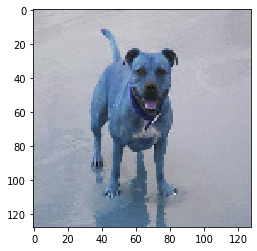

In [55]:
plt.imshow(X_train[0])

In [56]:
from matplotlib import pyplot as plt
gen = train_generator.flow(X_train[0:1], batch_size=1)
for i in range(1, 20):
    plt.subplot(1,20,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [57]:
labels['breed_y'].value_counts()

97    126
73    117
1     116
42    115
11    114
     ... 
22     67
49     67
65     67
23     66
43     66
Name: breed_y, Length: 120, dtype: int64

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [59]:
model.fit_generator(train_generator.flow(X_train,Y_train,batch_size=128),validation_data=val_generator.flow(X_test,Y_test),epochs=10,steps_per_epoch=len(X_train)//128)

Epoch 1/10
20/55 [=========>....................] - ETA: 5:34 - loss: 12.5198 - acc: 0.0187

KeyboardInterrupt: ignored

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('/content/gdrive/My Drive/CNN/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg', input_shape = (128, 128, 3))

In [0]:
model_1 = keras.applications.VGG16(weights = "/content/gdrive/My Drive/CNN/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5", include_top=False, input_shape = (128, 128, 3))

Print the summary of the base_model

In [63]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [64]:
model_1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from keras.models import Model
from keras import optimizers

In [66]:
z = base_model.output
z = Flatten()(z)
z = Dense(1024,activation='relu')(z)
#z = BatchNormalization()(z)
z = Dense(256,activation='relu')(z)
#z = BatchNormalization()(z)
predictions = Dense(120,activation='softmax')(z)
# creating the final model 
model_final = Model(inputs = base_model.input, outputs = predictions)
# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.adagrad(lr=1.0), metrics=["accuracy"])
model_final.summary()

ValueError: ignored

In [67]:
x = model_1.output
x = Flatten()(x)
x = Dense(1024,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(256,activation='relu')(x)
x = BatchNormalization()(x)
predictions_1 = Dense(120,activation='softmax')(x)
# creating the final model 
model_1_final = Model(inputs = model_1.input, outputs = predictions_1)
# compile the model 
model_1_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.adagrad(lr=0.1), metrics=["accuracy"])
model_1_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in model_1_final.layers:
    layer.trainable = False

In [69]:
for layer in model_1_final.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [70]:
model_1_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [71]:
model_1_final

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
model_1_final.fit(X_train,Y_train,epochs=10,batch_size=100,validation_data=(X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 7155 samples, validate on 3067 samples
Epoch 1/10
 200/7155 [..............................] - ETA: 1:14:30 - loss: nan - acc: 0.0050       